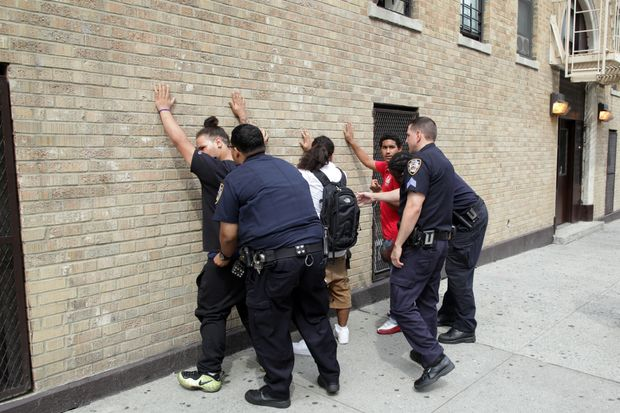
# **Data Analysis Project**
## Members: *Chidvi Doddi, Diana Bui, and Susanna Morin*
## Group name: Rage Against the Machine
## Data set: NYPD 2019 SQF Dataset

## **Objective: Examining fairness definitions**
###We are looking at the NYPD's 2019 Stop, Question, and Frisk Database. Based on an ML model trained with the data, we want to see what fairness definition the NYPD uses in its SQF encounters spanning different racial groups.

The databse contains all of the recorded NYPD stop incidences and details pertaining to each stop. Some of the features recorded include: the description of the suspected crime, whether the officer was wearing a uniform, the suspect's demeanor, and the location of the stop. These incidents were entered manually through an app then they are uploaded automatically into the database. 

The methods, techniques, and terms featured in this project to present our findings are sourced from module 3. 

---
#**Dataset Preprocessing**
This process is comprised of three parts: 
1. Dropping extraneous columns.
> The columns to drop are: 
> 
> STOP_FRISK_ID_ANONY, STOP_FRISK_DATE, STOP_FRISK_TIME, YEAR2,
MONTH2,
DAY2,
STOP_WAS_INITIATED,
RECORD_STATUS_CODE,
ISSUING_OFFICER_RANK,
ISSUING_OFFICER_COMMAND_CODE,
SUPERVISING_OFFICER_RANK,
SUPERVISING_OFFICER_COMMAND_CODE,
LOCATION_IN_OUT_CODE,
JURISDICTION_CODE,
OFFICER_EXPLAINED_STOP_FLAG,
OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION,
SUSPECT_ARREST_OFFENSE,
SUMMONS_ISSUED_FLAG,
SUMMONS_OFFENSE_DESCRIPTION,
OFFICER_IN_UNIFORM_FLAG,
ID_CARD_IDENTIFIES_OFFICER_FLAG,
SHIELD_IDENTIFIES_OFFICER_FLAG,
VERBAL_IDENTIFIES_OFFICER_FLAG,
OTHER_CONTRABAND_FLAG,
FIREARM_FLAG,
KNIFE_CUTTER_FLAG,
OTHER_WEAPON_FLAG,
PHYSICAL_FORCE_CEW_FLAG,
PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG,
PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG,
PHYSICAL_FORCE_OC_SPRAY_USED_FLAG,
PHYSICAL_FORCE_OTHER_FLAG,
PHYSICAL_FORCE_RESTRAINT_USED_FLAG,
PHYSICAL_FORCE_WEAPON_IMPACT_FLAG,
BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG,
BACKROUND_CIRCUMSTANCES_SUSPECT_KNOWN_TO_CARRY_WEAPON_FLAG,
SUSPECTS_ACTIONS_CASING_FLAG,
SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG,
SUSPECTS_ACTIONS_DECRIPTION_FLAG,
SUSPECTS_ACTIONS_DRUG_TRANSACTIONS_FLAG,
SUSPECTS_ACTIONS_IDENTIFY_CRIME_PATTERN_FLAG,
SUSPECTS_ACTIONS_LOOKOUT_FLAG,
SUSPECTS_ACTIONS_OTHER_FLAG,
SEARCH_BASIS_ADMISSION_FLAG,
SEARCH_BASIS_CONSENT_FLAG,
SEARCH_BASIS_HARD_OBJECT_FLAG,
SEARCH_BASIS_OTHER_FLAG,
SEARCH_BASIS_OUTLINE_FLAG,
DEMEANOR_CODE,
DEMEANOR_OF_PERSON_STOPPED,
SUSPECT_REPORTED_AGE,
SUSPECT_HEIGHT,
SUSPECT_WEIGHT,
SUSPECT_EYE_COLOR,
SUSPECT_HAIR_COLOR,
SUSPECT_OTHER_DESCRIPTION,
STOP_LOCATION_PRECINCT,
STOP_LOCATION_APARTMENT,
STOP_LOCATION_FULL_ADDRESS,
STOP_LOCATION_STREET_NAME,
STOP_LOCATION_X,
STOP_LOCATION_Y,
STOP_LOCATION_ZIP_CODE,
STOP_LOCATION_PATROL_BORO_NAME

2. Feature engineering
> For categorical features, convert all string values to numerical values. For Nan and (null) values, populate as '0'. For No, substitute for 1s and Yes to 2s. For other values, map starting from 1. 
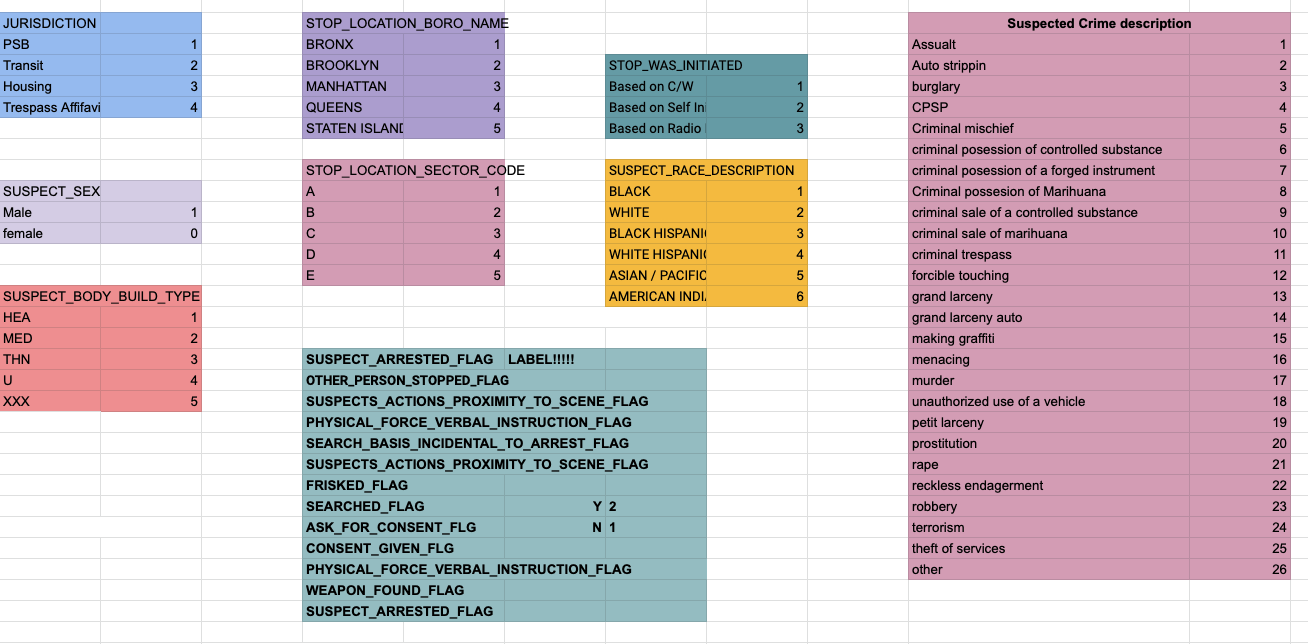
3. Column movement
> Move column "SUSPECT_ARRESTED_FLAG" to the end of dataset. 

For convience and ease, we suggest making these changes in Excel or an equivalent application.

The resulting dataset consists of 20 columns. 



---


# **Onboarding Process**

Below we import in all of the necessary libraries and packages for analysis. Then we load in the preprocessed CSV file as a dataframe. 

In [ ]:
# Pandas, Numpy, Warnings, SciKit Learn, MatplotLib, MLXTEND

import pandas as pd                                      # to read CSV
import numpy as np                                       # for versatile numpy arrays
import warnings                                          # Suppressing warnings
warnings.filterwarnings('ignore') 
from sklearn.linear_model import LogisticRegression      # log reg for ml model
from sklearn.model_selection import train_test_split     # splits dataset into train and test set
from sklearn import metrics as metrics                   # help plot roc curve
# from sklearn.metrics import ConfusionMatrixDisplay     # display matrix
import matplotlib.pyplot as plt                          # plots matplotlib
from mlxtend.plotting import plot_confusion_matrix       # plots confusion matrix

In [ ]:
# read the csv file and create dataframes:

data = pd.read_csv("NYPD2019.csv")
data = data.fillna(value = 0)                            #fill Nan values with 0, doing it here takes less effort
data.head()
#data.shape #(13459, 20)

,STOP_WAS_INITIATED,JURISDICTION_DESCRIPTION,OBSERVED_DURATION_MINUTES,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,OTHER_PERSON_STOPPED_FLAG,FRISKED_FLAG,SEARCHED_FLAG,ASK_FOR_CONSENT_FLG,CONSENT_GIVEN_FLG,WEAPON_FOUND_FLAG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUSPECTS_ACTIONS_PROXIMITY_TO_SCENE_FLAG,SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_BODY_BUILD_TYPE,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_BORO_NAME,SUSPECT_ARRESTED_FLAG
0,3,0.0,3,13.0,14,1,2,2,0.0,0.0,1,2.0,0.0,0.0,2.0,4.0,4.0,3.0,3,1
1,1,1.0,1,0.0,3,1,2,1,2.0,2.0,1,2.0,0.0,0.0,1.0,1.0,3.0,2.0,3,1
2,3,1.0,1,1.0,10,1,2,1,1.0,1.0,1,2.0,2.0,0.0,2.0,1.0,2.0,3.0,2,1
3,2,3.0,1,0.0,10,1,2,1,1.0,1.0,1,2.0,0.0,0.0,2.0,1.0,2.0,1.0,2,1
4,3,3.0,1,23.0,20,2,2,1,2.0,2.0,1,2.0,0.0,0.0,2.0,4.0,3.0,3.0,4,1


## Type Conversion
Now transform the Dataframe into Numpy arrays. This makes it easier for us throughout the analysis. 


In [ ]:
dataX = data.values[:, :19]             # feature vectors
dataY = data.values[:, -1:].ravel()     # target label: "SUSPECT_ARRESTED_FLAG"



---
#**Training and Predicting with the Machine Learning Model**
## For our purposes, we chose a logistic regression model. We felt this was an appropriate choice for a multitude of reasons (time, context of the data, etc.). 

The following code is taken from an open source GitHub repository. We utilized the suite to check the train and test data split is truly representative of the dataset. At the start of our project, we encountered an issue with splits that were not representative of the entire NYPD SQF dataset. This helped us troubleshoot the error. So for analysis, this section is not necessary because we have adequately preprocessed the data. 


In [ ]:
def CreateFitModel(X_in, y_in):
    
    # create/initialize model
    model = LogisticRegression().fit(X_in, y_in)
    #training model with training data set
    model.fit(X_in, y_in)
    
    return(model)

print("Testing...")
myModel = CreateFitModel(dataX,dataY)
print("Done.")

def ScoreAndStats(X, y, X_train, y_train, X_test, y_test):
    
    # Show shapes of all datasets (full, train, test)
    
    print("Shapes X(r,c) y(r,c)\n")
    print("Full  ", X.shape, y.shape)
    print("  Train ", X_train.shape, y_train.shape)
    print("  Test  ", X_test.shape, y_test.shape)
    
    # Show labels count and proprotions for all datasets
    
    print("\nLabels")
    print("\nFull  dataset")
    labelStats(y)
    print("\nTrain dataset")
    labelStats(y_train)
    print("\nTest  dataset")
    labelStats(y_test)
    
    # Create, fit and score model using only full dataset
    
    print()
    print("\nFull Dataset (X,y)         Fit and scoring using the full dataset (X,y) --------------------------")
    myModel = CreateFitModel(X,y)
    scoreModel(myModel,X,y)                   # Notice model fit and score data is the same.. NOOOO!
    
    # Split full dataset, create model using TRAIN then score model using TEST
    
    print("\nSplit Dataset (train/test) Training (X_train, y_train) and Testing (X_test, y_test) Data ---------")
    myModel = CreateFitModel(X_train,y_train) # Create and fit model using TRAINING subset
    scoreModel(myModel,X_test,y_test)         # Scoring is based on TRAINING fitted model and TEST data
    
    # Confusion Matrix Explained
    # Truth/Actual are the rows, Predictions are the columns
    #        green  red
    # green     10    2 <-- 12 greens, 10 green predicted as green, 2 greens predicted as red 
    #   red      5   13 <-- 15 reds, 5 reds predicted as green, 13 reds predicted as red 
    from sklearn.metrics import confusion_matrix 
    
    print("\nConfusion Matrix (based on TEST data)")
    myTargets = np.unique(y)
    y_predictions = myModel.predict(X_test)
    print()
    print(pd.DataFrame(confusion_matrix(y_test, y_predictions, myTargets), index=myTargets, columns=myTargets))

def labelStats(label_array_in):
    
    from collections import Counter
    
    # Get label counts and percentages (proportions)
    
    (unique, counts) = np.unique(label_array_in, return_counts=True)
    frequencies = np.asarray((unique, counts)).T
    
    for row in range(np.shape(frequencies)[0]):
        myPct = 100*frequencies[row,1]/np.shape(label_array_in)[0]
        print("{color:8} {cnt:5f}  {pct:5.1f}".format(color=frequencies[row,0], cnt=frequencies[row,1], pct=myPct))

print("Testing...\n")
labelStats(dataY)
print("\nDone.")

def scoreModel(model_in, X_in, y_in):
    
    from sklearn.metrics import accuracy_score
    
    # predict using the initialized and fitted model
    y_predictions = model_in.predict(X_in)
    print("Score: ", accuracy_score(y_in, y_predictions))
    
    # better scoring, but out of scope for this article
    #scores = cross_val_score(model_in, X_in, y_in, cv=5, n_jobs=3)
    #print("\nScores\n")
    #print("All   ", scores)
    #print("Mean  ", scores.mean())
    #print("Median", np.median(scores))

print("Testing...")
scoreModel(myModel,dataX,dataY)
print("Done.")

Testing...
Done.
Testing...

     1.0 9151.000000   68.0
     2.0 4308.000000   32.0

Done.
Testing...
Score:  0.8729474700943607
Done.


## Here is the splitting of the dataset and training and fitting of the logistic regression model. 

The train : test split is 80:20 and we set the random state for train_test_split as 123. The splits is stratified on the target label and printout shows split is representative of dataset. 

Variables:


*   dataX_train: features training set
*   dataX_test:  features test set
*   dataY_train: label training set
*   dataY_test:  label test set
*   y_hat_score: logistic regression model



In [ ]:
dataX_train, dataX_test, dataY_train, dataY_test = train_test_split(dataX, dataY, test_size = 0.2, stratify = dataY, random_state = 123)

ScoreAndStats(dataX, dataY, dataX_train, dataY_train, dataX_test, dataY_test)

reg = LogisticRegression()

reg.fit(dataX_train,dataY_train)       # training model with training data set
y_hat_score = reg.predict(dataX_test)  # model predicting with test data set


Shapes X(r,c) y(r,c)

Full   (13459, 19) (13459,)
  Train  (10767, 19) (10767,)
  Test   (2692, 19) (2692,)

Labels

Full  dataset
     1.0 9151.000000   68.0
     2.0 4308.000000   32.0

Train dataset
     1.0 7321.000000   68.0
     2.0 3446.000000   32.0

Test  dataset
     1.0 1830.000000   68.0
     2.0 862.000000   32.0


Full Dataset (X,y)         Fit and scoring using the full dataset (X,y) --------------------------
Score:  0.8729474700943607

Split Dataset (train/test) Training (X_train, y_train) and Testing (X_test, y_test) Data ---------
Score:  0.8655274888558693

Confusion Matrix (based on TEST data)

      1.0  2.0
1.0  1745   85
2.0   277  585




---


# **Fairness Definitions**

In module 3, we learned a handful of the many definitions of fairness. For the purpose of this project, we investigated only 2 of the definitions: **Predictive Rate Parity** and **Demographic Parity**. To help us, we will be utilizing tools and concepts presented in Lab 3.

We attempted to uncover which fairness definition the NYPD operates with in mind. We did this by performing error analyses with our trained logistic regression model.

### **Splitting dataX by Racial Group**
In the following box, we have derived a function called "split_on_feature" that returns feature vector and label arrays populated with the feature vectors of the corresponding race. We use these arrays to predict on our model.

There are 6 racial groups in the dataset: Black, White, Black Hispanic, White Hispanic, Asian and Pacific Islander, and Native American Indian. This feature is in the 16th column (index 15). 

In [ ]:
# if for race column ex. split on {1, 2, 3, 4, 5, 6}
# SUSPECT_RACE_DESCRIPTION
# column index 15

def split_on_feature(dataX, dataY):
    rows_black = []          #1:BLACK
    rows_white = []          #2: WHITE
    rows_black_hispanic = [] #3: BLACK HISPANIC
    rows_white_hispanic = [] #4: WHITE HISPANIC
    rows_asian_pacific = []  #5: ASIAN / PACIFIC ISLANDER
    rows_na_indian = []      #6: AMERICAN INDIAN/ALASKAN N(ATIVE)
    
    #looking through data and recording features w/r to race
    for i in range(dataX.shape[0]):
        if dataX[i, 15] == 1:
            rows_black.append(i)
        elif dataX[i, 15] == 2:
            rows_white.append(i)
        elif dataX[i, 15] == 3:
            rows_black_hispanic.append(i)
        elif dataX[i, 15] == 4:
            rows_white_hispanic.append(i)
        elif dataX[i, 15] == 5:
            rows_asian_pacific.append(i)
        else: # if dataX[i, 15] == 6
            rows_na_indian.append(i)


    #for i in range(dataX.shape[0]):
        #else:
            # print("else",dataA[i, column])
            #rows_B.append(i)

    # selecting rows and placing them into their own np.arrays
    #dataX values
    X_black = dataX[rows_black, :]
    X_white = dataX[rows_white, :]
    X_black_hispanic = dataX[rows_black_hispanic, :]
    X_white_hispanic = dataX[rows_white_hispanic, :]
    X_asian_pacific = dataX[rows_asian_pacific, :]
    X_na_indian = dataX[rows_na_indian, :]

    #dataY values
    Y_black = dataY[rows_black]
    Y_white = dataY[rows_white]
    Y_black_hispanic = dataY[rows_black_hispanic]
    Y_white_hispanic = dataY[rows_white_hispanic]
    Y_asian_pacific = dataY[rows_asian_pacific]
    Y_na_indian = dataY[rows_na_indian]

    
    return X_black, X_white, X_black_hispanic, X_white_hispanic, X_asian_pacific, X_na_indian, Y_black, Y_white, Y_black_hispanic, Y_white_hispanic, Y_asian_pacific, Y_na_indian


### Variables

*   y_hat_black: model predicted with Black people
*   y_hat_white: model predicted with White people
*   y_hat_black_his: model predicted with Black Hispanic people
*   y_hat_white_his: model predicted with White Hispanic people
*   y_hat_asian_pa: model predicted with Asian and Pacific Islander people
*   y_hat_na_indi: model predicted with Native American Indian people

In [ ]:
# splitting up the data!
# this line is atrocious but no way around it
X_black, X_white, X_black_hispanic, X_white_hispanic, X_asian_pacific, X_na_indian, Y_black, Y_white, Y_black_hispanic, Y_white_hispanic, Y_asian_pacific, Y_na_indian = split_on_feature(dataX, dataY)

# predict on model! with the arrays
y_hat_black = reg.predict(X_black)
y_hat_white = reg.predict(X_white)
y_hat_black_his = reg.predict(X_black_hispanic)
y_hat_white_his = reg.predict(X_white_hispanic)
y_hat_asian_pa = reg.predict(X_asian_pacific)
y_hat_na_indi = reg.predict(X_na_indian)


# **Predictive Rate Parity**
This is the first fairness definition we examined. In essence, this definition is satisfied when all groups in the protected attribute of the dataset have the same probability of a subject with a positive predicted value (PPV) to truly belong to the positive class. This also true for the negative case (FDR). 

We chose this definition because we believe precision in sensitve situations like a stop and frisk is very important. The precision across each racial groups should be the same to be fair.

### **Predictive Rate Parity Error**
For a group G, true classification Y, and classifier output Y', we calculated the error using the formula

### ∑𝑦|𝑃(Y = y|G = 1, Y' = 𝑦)− 𝑃(Y = y|G = 2, Y' = 𝑦) - ... - 𝑃(Y = y|G = 6, Y' = 𝑦)|

The following code defines a function called "PPV_FDR" that returns the proportion of a subject with a positive predicted value to truly belong to the positive class in a racial group. It also returns the negative case. This function helps calculate the **predictive rate parity error** (2nd box). 

In [ ]:
# calculates ppv and fdr of a race group
# less cluttered code than doing all in one single function
def PPV_FDR(y_hat, y):
    yes = 0
    no = 0;

    for i in range(len(y_hat)):
        if (y_hat[i]==1 and y[i]==1):
            no += 1
        if (y_hat[i]==2 and y[i]==2):
            yes += 1

    throwaway, counts = np.unique(y_hat, return_counts = True)
    no_count, yes_count = counts[0], counts[1]

    count_one_hat = yes/yes_count #ppv
    count_zero_hat = no/no_count  #fdr

    return count_one_hat, count_zero_hat


In [ ]:
#calculating ppv and fdr for each race group
ppv_black, fdr_black = PPV_FDR(y_hat_black, Y_black)
ppv_white, fdr_white = PPV_FDR(y_hat_white, Y_white)
ppv_black_his, fdr_black_his = PPV_FDR(y_hat_black_his, Y_black_hispanic)
ppv_white_his, fdr_white_his = PPV_FDR(y_hat_white_his, Y_white_hispanic)
ppv_asian_pa, fdr_asian_pa = PPV_FDR(y_hat_asian_pa, Y_asian_pacific)
ppv_na_indi, fdr_na_indi = PPV_FDR(y_hat_na_indi, Y_na_indian)

#calculating predictive parity error
predictive_parity_err = np.abs(fdr_black - fdr_white - fdr_black_his - fdr_white_his - fdr_asian_pa - fdr_na_indi)
#print(fdr_black, fdr_white, fdr_black_his, fdr_white_his, fdr_asian_pa, fdr_na_indi)
predictive_parity_err += np.abs(ppv_black - ppv_white - ppv_black_his - ppv_white_his - ppv_asian_pa - ppv_na_indi)
#print(ppv_black, ppv_white, ppv_black_his, ppv_white_his, ppv_asian_pa, ppv_na_indi)

#if definition is followed, should be near 0
#display error
print("The predictive rate parity error for this model is", predictive_parity_err)

The predictive rate parity error for this model is 6.635002847196063


# **Demographic Parity**
Then we examined if the model followed the definition of Demogrpahic Parity. This definition strives for an equal probability of a subject being assigned to the positive prediction class across/for all groups in the protected attribute. Lab 3 says the demographic parity is "the ratio of the group in the whole population will be the same as the ratio of the group in the predicted classes". 

We chose this definition because it is supported legally by what is called the "four-fifth rule" (discussed in the article linked above). This in conjunction with the fact this is the NYPD, a government agency, we felt it was necessary to evaluate the model with this definition. 

### **Demographic Parity Error**
For a group G and true classification Y, we calculated the demographic parity error using the following formula

### ∑𝑔,𝑦|𝑃(𝐺 = 𝑔|Y = 𝑦) − 𝑃(𝐺 = 𝑔)|

We followed the same process as we did for Predictive Rate Parity. We first defined a function called "demographic_parity_error" to calculate the **demographic parity error** for a specific group. This helped us shorten the process of finding the total error (process in 2nd box).

In [ ]:
# args: 
# y_hat is predicted values
# y_no is number of NO/1 predicted
# y_yes is number of YES/2 predicted

# to make things easier, function only calculates dpe for one group
def demographic_parity_error(y_hat, y_no, y_yes): 
    #error can be more than 1
    #g = 1, ... 6
    
    num_ppl = len(y_hat)
    prob_ppl = len(y_hat)/740 #number of feature vectors = 740
    ppl_given_yes = num_ppl/y_yes
    ppl_given_no = num_ppl/y_no
    
    dp_error = np.abs(ppl_given_no - prob_ppl) + np.abs(ppl_given_yes - prob_ppl)
    
    return dp_error


In [ ]:
#calculating p(Y = 1, 0)
throwaway, counts = np.unique(y_hat_black, return_counts = True)
black_no, black_yes = counts[0], counts[1]
throwaway, counts = np.unique(y_hat_white, return_counts = True)
white_no, white_yes = counts[0], counts[1]
throwaway, counts = np.unique(y_hat_black_his, return_counts = True)
black_his_no, black_his_yes = counts[0], counts[1]
throwaway, counts = np.unique(y_hat_white_his, return_counts = True)
white_his_no, white_his_yes = counts[0], counts[1]
throwaway, counts = np.unique(y_hat_asian_pa, return_counts = True)
asian_pa_no, asian_pa_yes = counts[0], counts[1]
throwaway, counts = np.unique(y_hat_na_indi, return_counts = True)
na_indi_no, na_indi_yes = counts[0], counts[1]

y_no = black_no + white_no + black_his_no + white_his_no + asian_pa_no + na_indi_no
y_yes = black_yes + white_yes + black_his_yes + white_his_yes + asian_pa_yes + na_indi_yes

error = demographic_parity_error(y_hat_black, black_no, black_yes)
#print(error)
error += demographic_parity_error(y_hat_white, white_no, white_yes)
#print(error)
error += demographic_parity_error(y_hat_black_his, black_his_no, black_his_yes)
#print(error)
error += demographic_parity_error(y_hat_white_his, white_his_no, white_his_yes)
#print(error)
error += demographic_parity_error(y_hat_asian_pa, asian_pa_no, asian_pa_yes)
#print(error)
error += demographic_parity_error(y_hat_na_indi, na_indi_no, na_indi_yes)

#display dpe
print("The demographic parity error for this model is", error)

The demographic parity error for this model is 31.877774923047387


## **Does this pattern appear in general stop-and-frisk incidents?**

In [ ]:
frisked_dataset = np.copy(data.values[:, :])
frisked_dataset[:, [6, 19]] = frisked_dataset[:, [19, 6]] #swaps Frisked_flag and arrested_flag

friskedX = frisked_dataset[:, :19]
friskedY = frisked_dataset[:, -1:].ravel() #FRISKED_FLAG

#splitting into test and training data, 80:20 split (TRAIN:TEST)
friskX_train, friskX_test, friskY_train, friskY_test = train_test_split(friskedX, friskedY, test_size = 0.2, stratify = friskedY, random_state = 123)
#stratifying dataY groups
reg = LogisticRegression()

#training model with training data set
reg.fit(friskX_train, friskY_train)
# model predicting with test data set
#y_hat_frisk = reg.predict(friskX_test)

#split on racial groups
fX_black, fX_white, fX_black_hispanic, fX_white_hispanic, fX_asian_pacific, fX_na_indian, fY_black, fY_white, fY_black_hispanic, fY_white_hispanic, fY_asian_pacific, fY_na_indian = split_on_feature(friskedX, friskedY)

# predict on model! with the arrays
f_hat_black = reg.predict(fX_black)
f_hat_white = reg.predict(fX_white)
f_hat_black_his = reg.predict(fX_black_hispanic)
f_hat_white_his = reg.predict(fX_white_hispanic)
f_hat_asian_pa = reg.predict(fX_asian_pacific)
f_hat_na_indi = reg.predict(fX_na_indian)

#ppe
#calculating ppv and fdr for each race group
ppv_black, fdr_black = PPV_FDR(f_hat_black, fY_black)
ppv_white, fdr_white = PPV_FDR(f_hat_white, fY_white)
ppv_black_his, fdr_black_his = PPV_FDR(f_hat_black_his, fY_black_hispanic)
ppv_white_his, fdr_white_his = PPV_FDR(f_hat_white_his, fY_white_hispanic)
ppv_asian_pa, fdr_asian_pa = PPV_FDR(f_hat_asian_pa, fY_asian_pacific)
ppv_na_indi, fdr_na_indi = PPV_FDR(f_hat_na_indi, fY_na_indian)

#calculating predictive parity error
predictive_parity_err = np.abs(fdr_black - fdr_white - fdr_black_his - fdr_white_his - fdr_asian_pa - fdr_na_indi)
predictive_parity_err += np.abs(ppv_black - ppv_white - ppv_black_his - ppv_white_his - ppv_asian_pa - ppv_na_indi)
#all of error comes from line 41

#if definition is followed, should be near 0
#display error
print("Predictive rate parity error for FRISKED_FLAG", predictive_parity_err)

throwaway, counts = np.unique(f_hat_black, return_counts = True)
black_no, black_yes = counts[0], counts[1]
throwaway, counts = np.unique(f_hat_white, return_counts = True)
white_no, white_yes = counts[0], counts[1]
throwaway, counts = np.unique(f_hat_black_his, return_counts = True)
black_his_no, black_his_yes = counts[0], counts[1]
throwaway, counts = np.unique(f_hat_white_his, return_counts = True)
white_his_no, white_his_yes = counts[0], counts[1]
throwaway, counts = np.unique(f_hat_asian_pa, return_counts = True)
asian_pa_no, asian_pa_yes = counts[0], counts[1]
throwaway, counts = np.unique(f_hat_na_indi, return_counts = True)
na_indi_no, na_indi_yes = counts[0], counts[1]

y_no = black_no + white_no + black_his_no + white_his_no + asian_pa_no + na_indi_no
y_yes = black_yes + white_yes + black_his_yes + white_his_yes + asian_pa_yes + na_indi_yes

error = demographic_parity_error(f_hat_black, black_no, black_yes)
error += demographic_parity_error(f_hat_white, white_no, white_yes)
error += demographic_parity_error(f_hat_black_his, black_his_no, black_his_yes)
error += demographic_parity_error(f_hat_white_his, white_his_no, white_his_yes)
error += demographic_parity_error(f_hat_asian_pa, asian_pa_no, asian_pa_yes)
error += demographic_parity_error(f_hat_na_indi, na_indi_no, na_indi_yes)

#display dpe
print("Demographic parity error for FRISKED_FLAG", error)


Predictive rate parity error for FRISKED_FLAG 5.387094537543531
Demographic parity error for FRISKED_FLAG 29.40971518333888




---


# **Fairness Definition Errors Comparison**
Now that we have calculated the **predictive rate parity error** and **demographic parity error**, let us now interpret the results.

If the model satisfies a definition of fairness, then we expect the error for that definition to be close to 0. 

The predictive rate parity error is ***6.635002847196063***.

The demographic parity error is ***31.877774923047387***.

Looking at the two errors, we see that none of the errors are not close to 0. 

For predictive rate parity, the error within each group across positive and negative classifications are very high. 
> The lowest was the PPV for Native Americans at ***0.5405405405405406***. The highest error was the PPV for White Hispanics at ***0.9108910891089109***. The predictive parity error is too high to consider the model fair by this definition.

For demographic parity error, most of the error came from ***Black*** people. 
> The error from Black people accounted for almost *half* of the parity error (*16.10836465087451*). This error is too high to consider the model fair by the definition of demographic parity error.

**For the FRISKED_FLAG, the same trend appears and the same interpretation can be drawn.**

#### **Our findings suggest that the model is not fair (or fair but in the context of a different fairness definition). This implies the NYPD is not fair with arrests of the different racial groups within the dataset.**



---
# **Conclusion**
Our findings conclude that our model is not fair in terms of predictive rate parity or demographic parity. 

We hypothesize the definition the model follows is fairness through unawareness. This also means that the NYPD officers follow fairness through unawareness in its stop and frisk incidents.

This hypothesis *seems* factually incorrect, because our model used the protected attribute of race to predict values. However, this conjecture is based on background knowledge and understanding of the dataset and the context it comes from. 

Out in the field, police officers are to remain fair in their treatment by only acting under factual pretenses. However, we know from reports that the NYPD has a history of unfairly targeting minorities and this is especially so for the stop, question, and frisk program. 

Even though officers try their best not to use race as an attribute, other features in the data play as proxy. For our dataset, two of these features are "JURISDICTION_DESCRIPTION" and "STOP_LOCATION_SECTOR_CODE". These features are location based and like many other states, certain demographics of people congregate towards certain parts of the state. 

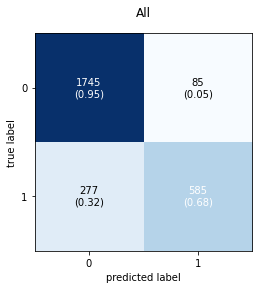

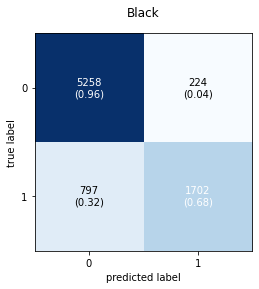

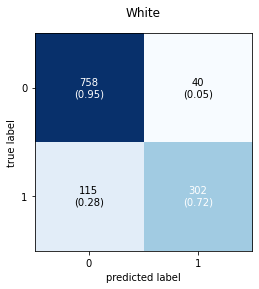

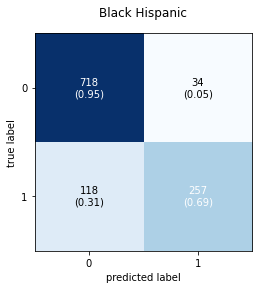

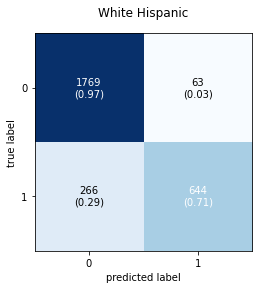

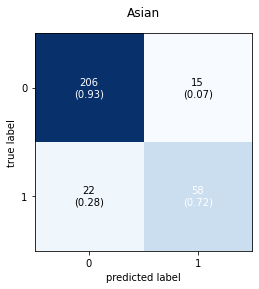

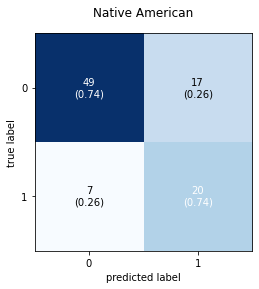

In [ ]:
from sklearn import metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

Y_test = dataY_test
Y_hat = y_hat_score

cfm = metrics.confusion_matrix(Y_test, Y_hat, labels = [1, 2])

fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)
ax.set_title('All') 
plt.show()


#Black


Y_test = Y_black
Y_hat = y_hat_black


cfm = metrics.confusion_matrix(Y_test, Y_hat, labels = [1, 2])
fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)
ax.set_title('Black') 
plt.show()


#White

Y_test = Y_white
Y_hat = y_hat_white

cfm = metrics.confusion_matrix(Y_test, Y_hat, labels = [1, 2])
fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)
ax.set_title('White') 
plt.show()

#Black Hispanic

Y_test = Y_black_hispanic
Y_hat = y_hat_black_his

cfm = metrics.confusion_matrix(Y_test, Y_hat, labels = [1, 2])
fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)
ax.set_title('Black Hispanic') 
plt.show()

#White Hispanic


Y_test = Y_white_hispanic
Y_hat = y_hat_white_his

cfm = metrics.confusion_matrix(Y_test, Y_hat, labels = [1, 2])
fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)
ax.set_title('White Hispanic') 
plt.show()

#Asian


Y_test = Y_asian_pacific
Y_hat = y_hat_asian_pa

cfm = metrics.confusion_matrix(Y_test, Y_hat, labels = [1, 2])
fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)
ax.set_title('Asian') 
plt.show()

#native americans


Y_test = Y_na_indian
Y_hat = y_hat_na_indi

cfm = metrics.confusion_matrix(Y_test, Y_hat, labels = [1, 2])
fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)
ax.set_title('Native American') 
plt.show()
#y_hat_na_indi, Y_na_indian

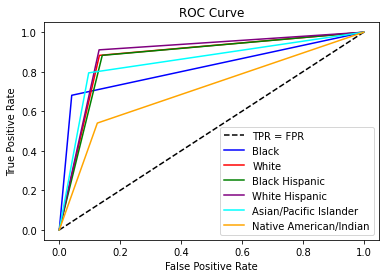

In [ ]:
#line plot

%matplotlib inline 
import matplotlib.pyplot as plt

fpr_black, tpr_black, thresholds = metrics.roc_curve(Y_black, y_hat_black, pos_label = 2)
fpr_white, tpr_white, thresholds = metrics.roc_curve(y_hat_white, Y_white, pos_label = 2)
fpr_black_his, tpr_black_his, thresholds = metrics.roc_curve(y_hat_black_his, Y_black_hispanic, pos_label = 2)
fpr_white_his, tpr_white_his, thresholds = metrics.roc_curve(y_hat_white_his, Y_white_hispanic, pos_label = 2)
fpr_asian_pa, tpr_asian_pa, thresholds = metrics.roc_curve(y_hat_asian_pa, Y_asian_pacific, pos_label = 2)
fpr_na_indi, tpr_na_indi, thresholds = metrics.roc_curve(y_hat_na_indi, Y_na_indian, pos_label = 2)


plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], 'k--', label="TPR = FPR")
plt.plot(fpr_black, tpr_black, color='blue', label="Black")
plt.plot(fpr_white, tpr_white, color='red', label="White")
plt.plot(fpr_black_his, tpr_black_his, color='green', label="Black Hispanic")
plt.plot(fpr_white_his, tpr_white_his, color='purple', label="White Hispanic")
plt.plot(fpr_asian_pa, tpr_asian_pa, color='cyan', label="Asian/Pacific Islander")
plt.plot(fpr_na_indi, tpr_na_indi, color='orange', label="Native American/Indian")

plt.legend()
plt.show()




---
# ***Things to Note...***
"Trash in, trash out" - unknown

## Data Quality Issues
> ### Representativeness
> #### **Preprocessing**: 
We were merciless with the data we used for our model. We only accepted feature vectors with sufficient data and dropped all those that had *any* instance of values we could not use. We did not prioritise reprensativeness and it led to an extremely harmful (and incorrect) model. This is apparent when you compare the proporiton of arrests over the entire dataset and the "cleaned" dataset (0.32, 0.93). 
> #### **Noise and Sparse Data**: 
Looking at the original 2019 dataset, it is easy to see major data quality issues. This arises when officers and supervisors do not document and review all of their stops per their protocol ([NY Times](https://www.nytimes.com/2019/11/17/nyregion/bloomberg-stop-and-frisk-new-york.html)). Officers are more likely to record incidents properly when an arrest is made. So of the recorded stop-and-frisk incidents, the incidents that lead to an arrest are more likely to be robust in the data. This is apparent when we filter the data with respect to "SUSPECT_ARRESTED_FLAG" and a "Y" (or yes) value. Now look at the data when we filter with respect to "FRISKED_FLAG" and a "Y" value again. Note the difference in quality of the filtered data. Because of this, during the  pre-processing step, stop-and-frisk incidents that led to arrests were more favored. 

## Data Bias
> #### **Population Bias**:
There are significant differences in demographics in the dataset. Of the 13,459 stops recorded, 59% were Black and 29% were Hispanic or Latinx. Less than 10% were White. 
> #### **Behaviorial Bias**:
Not all of the officers are reporting every one of their incidents and when they do, the quality and descriptions of the report will be different for each person. For example, while on the scene, one officer describes the suspect as "NORMAL" and another officer describes the suspect as "APPARENTLY NORMAL". The two officers described the same person, but their interpretations are slightly different. 

# What We Would Do In the Future
Timing was a significant issue and proved a major detriment to our vision of this project.
During the initial planning stage of this project, we debated over what model(s) to use and attributes we wanted to include. 

We eventually chose the logistic regression model, but the other top contender was the decision tree model. We found packages that would display the decision tree the algorithm creates. This adds a layer of transparency that we felt was integral to a project that consists of so many sensitive attributes. We decided not to implement it for the sake of time, but should we do this again in the future, the decision tree model would be the answer. 

When deciding on which columns to drop and which ones to keep, we were very interested in the "DEMEANOR_OF_PERSON_STOPPED" feature. In the preprocessing stage, we attempted to feature engineer this attribute. However, this column consisted of 1,757 variables which would have taken a significant amount of time away from the time we had left to complete the project. It would be nice to see how this feature would have affected the outcome of our model.



---
# Citations

https://www.nydailynews.com/new-york/ny-metro-stop-frisk-monitor-report-20190111-story.html

@article{raschkas_2018_mlxtend,

1.   List item
2.   List item


  author       = {Sebastian Raschka},
  title        = {MLxtend: Providing machine learning and data science 
                  utilities and extensions to Python’s  
                  scientific computing stack},
  journal      = {The Journal of Open Source Software},
  volume       = {3},
  number       = {24},
  month        = apr,
  year         = 2018,
  publisher    = {The Open Journal},
  doi          = {10.21105/joss.00638},
  url          = {http://joss.theoj.org/papers/10.21105/joss.00638}
}

@inproceedings{sklearn_api,
  author    = {Lars Buitinck and Gilles Louppe and Mathieu Blondel and
               Fabian Pedregosa and Andreas Mueller and Olivier Grisel and
               Vlad Niculae and Peter Prettenhofer and Alexandre Gramfort
               and Jaques Grobler and Robert Layton and Jake VanderPlas and
               Arnaud Joly and Brian Holt and Ga{\"{e}}l Varoquaux},
  title     = {{API} design for machine learning software: experiences from the scikit-learn
               project},
  booktitle = {ECML PKDD Workshop: Languages for Data Mining and Machine Learning},
  year      = {2013},
  pages = {108--122},
}

@article{raschkas_2018_mlxtend,

1.   List item
2.   List item


  author       = {Craig Shallahamer},
  title        = {Random Shuffle Strategy To Split Your Full Dataset},
  month        = jun,
  year         = 2020,
  publisher    = {OraPub},
  doi          = {10.21105/joss.00638},
  url          = {https://blog.orapub.com/20200630/random-shuffle-strategy-to-split-your-full-dataset.html}
}

NYPD dataset: https://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page

TLDR dataset: https://www.nyclu.org/en/stop-and-frisk-data

How to handle missing values: https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e

Feature Engineering: https://developers.google.com/machine-learning/crash-course/representation/feature-engineering

Create Fit Model: https://colab.research.google.com/drive/1yXPM2I3urC5W9SSfP2fhTGamPqaObY_m#scrollTo=XDQYFioMLlXI

Fairness Definition: https://towardsdatascience.com/a-tutorial-on-fairness-in-machine-learning-3ff8ba1040cb

https://en.wikipedia.org/wiki/New_York_City_Police_Department_corruption_and_misconduct
https://www.wsj.com/articles/nypds-stop-and-frisk-practice-still-affects-minorities-in-new-york-city-11574118605
https://www.nytimes.com/2019/11/17/nyregion/bloomberg-stop-and-frisk-new-york.html
